# 8. Machine Learning: Part 2

![](images/logo.png)

Welcome to the final Jupyter session! Congratulations for making it to the end! Your hard work has really paid off. In this session we are going to be applying the support vector machine classification algorithm to a new dataset. Here, we will be trying to predict the presence of heart disease given a set of data features about a person. 

As always, if you are running this notebook on your own computer, as opposed to the server, you will need to make sure that you have the relevant modules installed. To check, uncomment the third line, and try running the cell below

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# import sklearn

As long as you get no errors, you are good to go! As usual run this cell to make the matplotlib visualisations interactive

In [2]:
%matplotlib notebook

The data has the following features:


1. age: the patient age
2. sex: the sex of the patient
3. cp: how much chest pain the patient feels
4. restbps: resting blood pressure
5. chol: cholestoral level
6. fbs: whether fasting blood sugar is > 120 mg/dl
7. restecg: resting electrocardiographic results
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: normal,  fixed defect or  reversable defect
14. target: 1 if heart disezse is present, 0 otherwise

All columns except from target have also been scaled, so that they fall within the same range. 

For example, you will see that the age column looks strange! Don't worry - all values have just been scaled to be roughly between -1 and 1. This is to ensure each feature is equally weighted. 


# 1. Opening the data

The data is located in the folder called `data` and the file is called `heart.csv`. Use the pandas function `pd.read_csv()` to open this file and save it to a variable called `data`. 

In [3]:
data = pd.read_csv('data/heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873,1
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922,1
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922,1
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922,1
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,-1.468418,-0.938515,0.478391,-0.101730,-0.417635,0.898962,-1.165281,1.435481,-0.724323,-0.649113,-0.714429,1.123029,0
299,-1.033002,0.681005,1.973123,-1.234996,0.342756,-0.417635,0.898962,-0.771706,-0.696631,0.138373,-0.649113,-0.714429,1.123029,0
300,1.503641,0.681005,-0.938515,0.706843,-1.029353,2.394438,0.898962,-0.378132,-0.696631,2.036303,-0.649113,1.244593,1.123029,0
301,0.290464,0.681005,-0.938515,-0.092738,-2.227533,-0.417635,0.898962,-1.515125,1.435481,0.138373,-0.649113,0.265082,1.123029,0


# 2. Examining the data

We can examine the distrubution of values within a column using `plt.hist()`. Below is a histogram of the first column.

<IPython.core.display.Javascript object>


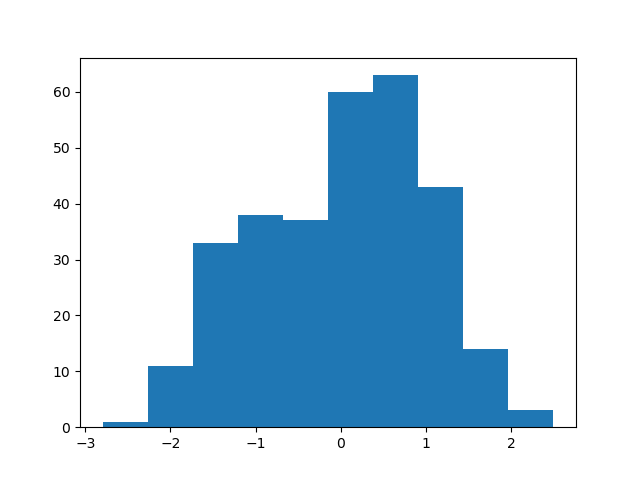

(array([ 1., 11., 33., 38., 37., 60., 63., 43., 14.,  3.]),
 array([-2.7976235 , -2.26823713, -1.73885077, -1.2094644 , -0.68007803,
        -0.15069166,  0.3786947 ,  0.90808107,  1.43746744,  1.96685381,
         2.49624017]),
 <a list of 10 Patch objects>)

In [4]:
plt.figure()

plt.hist(data['age'])

#### Do the same for some of the other columns. 

Are there any interesting patterns? 

<IPython.core.display.Javascript object>


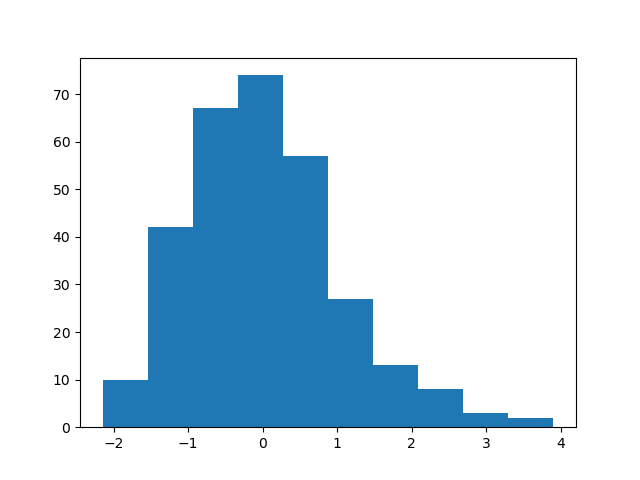

(array([10., 42., 67., 74., 57., 27., 13.,  8.,  3.,  2.]),
 array([-2.14880232, -1.54340554, -0.93800876, -0.33261198,  0.2727848 ,
         0.87818158,  1.48357836,  2.08897514,  2.69437191,  3.29976869,
         3.90516547]),
 <a list of 10 Patch objects>)

In [4]:
# your code here


plt.figure()

plt.hist(data['trestbps'])


<IPython.core.display.Javascript object>


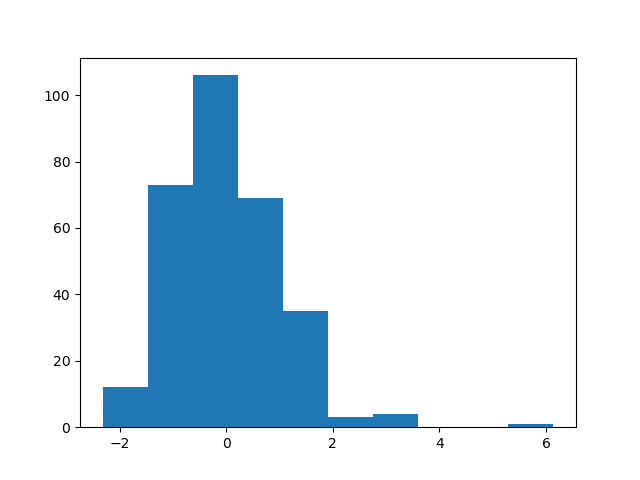

(array([ 12.,  73., 106.,  69.,  35.,   3.,   4.,   0.,   0.,   1.]),
 array([-2.32416031, -1.47770419, -0.63124806,  0.21520806,  1.06166419,
         1.90812031,  2.75457643,  3.60103256,  4.44748868,  5.29394481,
         6.14040093]),
 <a list of 10 Patch objects>)

In [5]:
plt.figure()

plt.hist(data['chol'])

In this dataset, a patient with heart disease is indicated with a 1, and a healthy patient is indicated with a 0. Can you find out how many of the rows contain individuals with heart disease? How many are healthy?

#### Use the dataframe to find out whether there are more cancerous or benign tumours in this dataset. 

In [8]:
# your code here

n_diseased = data['target'].sum()
n_healthy = len(data) - n_diseased

print('Number diseased: ', n_diseased)
print('Number healthy: ', n_healthy)


Number diseased:  165
Number healthy:  138


# Part 2: Preparing the data

Take a look at the code from the presentation showing how to use scikit learn to create a train test split. 



#### Edit this code to split this dataset into a training set and a test set



In [9]:
# your code here

from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.2, random_state=37)


In [10]:
train_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
218,1.172774,0.681005,-0.938515,0.192827,0.149501,-0.417635,-1.005832,-0.990359,-0.696631,1.518686,-0.649113,0.265082,1.123029,0
155,0.400752,-1.468418,-0.938515,-0.092738,-0.952051,-0.417635,0.898962,-0.815437,-0.696631,-0.379244,-0.649113,-0.714429,-0.512922,1
121,0.511041,0.681005,-0.938515,0.364165,0.478035,-0.417635,-1.005832,1.414819,-0.696631,-0.896862,0.976352,-0.714429,-0.512922,1
211,0.731619,0.681005,-0.938515,-0.663867,0.265454,-0.417635,0.898962,-0.421862,1.435481,2.208842,-0.649113,0.265082,1.123029,0
102,0.952197,-1.468418,0.032031,0.478391,-0.990702,-0.417635,0.898962,1.283627,-0.696631,-0.896862,0.976352,1.244593,-0.512922,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,-1.033002,0.681005,-0.938515,-1.577673,-0.739471,-0.417635,-1.005832,-0.072018,1.435481,1.691225,-0.649113,-0.714429,-0.512922,1
163,-1.805024,0.681005,1.002577,0.364165,-1.377212,-0.417635,0.898962,1.021244,-0.696631,-0.896862,0.976352,3.203615,-0.512922,1
122,-1.474158,-1.468418,1.002577,-1.120770,0.420058,-0.417635,-1.005832,0.977514,1.435481,-0.896862,0.976352,-0.714429,-0.512922,1
22,-1.363869,0.681005,-0.938515,0.478391,-0.391612,-0.417635,0.898962,1.239897,-0.696631,-0.896862,0.976352,-0.714429,-0.512922,1


In [11]:
test_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
229,1.062485,0.681005,1.002577,-0.378302,1.212403,-0.417635,0.898962,-0.815437,1.435481,0.655990,-0.649113,-0.714429,1.123029,0
230,-0.812425,0.681005,1.002577,-1.349222,-0.063079,-0.417635,0.898962,0.102904,-0.696631,-0.896862,0.976352,-0.714429,-0.512922,0
55,-0.260980,0.681005,0.032031,0.135714,-0.874749,-0.417635,0.898962,0.365287,-0.696631,-0.206705,0.976352,0.265082,-0.512922,1
30,-1.474158,-1.468418,0.032031,-1.520560,-0.932726,-0.417635,0.898962,0.802592,-0.696631,-0.896862,0.976352,0.265082,-0.512922,1
249,1.613930,0.681005,1.002577,0.478391,0.149501,-0.417635,-1.005832,-0.159479,-0.696631,0.828529,-0.649113,2.224104,1.123029,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,1.062485,0.681005,-0.938515,-0.663867,-0.005102,-0.417635,-1.005832,-2.346004,1.435481,1.001069,-2.274579,0.265082,-0.512922,0
271,0.731619,0.681005,1.973123,0.135714,-0.237008,-0.417635,0.898962,-0.203210,-0.696631,1.346147,-0.649113,1.244593,-0.512922,0
217,0.952197,0.681005,-0.938515,-0.092738,1.618238,2.394438,-1.005832,-0.771706,1.435481,0.655990,0.976352,2.224104,1.123029,0
72,-2.797624,0.681005,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,2.289429,-0.696631,-0.896862,0.976352,-0.714429,-0.512922,1


## Training the model

Now we are ready for training. 

#### Complete the code below to create a support vector machine classifier with a C-value of 1

In [12]:
from sklearn.svm import SVC

# your code here

clf = SVC(C=1)

clf.fit(train_data.iloc[:, :-1], train_data.iloc[:, -1])

SVC(C=1)

#### Now test this model on the test data



In [13]:
# your code here

prediction = clf.predict(test_data.iloc[:, :-1])

#### What is the percentage accuracy? 

In [16]:
# your code here

(prediction == test_data.iloc[:, -1]).sum() / len(test_data)

0.8524590163934426

#### Can you use K-fold cross validation to explore the accuracy further?

In [19]:
from sklearn.model_selection import KFold

# your code here

kf = KFold(n_splits=5, shuffle=True)

ac = []

for train_index, test_index in kf.split(data):
    
    X_train = data.iloc[train_index, :-1]
    X_test = data.iloc[test_index, :-1]
    
    y_train = data.iloc[train_index, -1]
    y_test = data.iloc[test_index, -1]
    
    classifier = SVC(C=1)
    classifier.fit(X_train, y_train)
    prediction = classifier.predict(X_test)
    
    ac.append(sum(prediction == y_test) / len(prediction))
    
print('Average accuracy across folds: ', sum(ac) / len(ac))

Average accuracy across folds:  0.8319125683060109


#### What do you think the optimal value of C is in this circumstance?

In [12]:
# your code here

